<a href="https://colab.research.google.com/github/Daniel-Page/tensorflow-learning-projects/blob/main/image_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Number Recognition
Image --> Model --> Character

In [115]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


## Import Dataset

In [116]:
# MNIST: a dataset of handwritten digits
# http://yann.lecun.com/exdb/mnist/
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0 # Int -> Float
x_test = x_test / 255.0 # Int -> Float

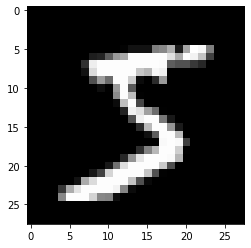

Ground truth number: 5


In [117]:
# Plots a single letter from the training set and prints the ground truth
plt.imshow(x_train[0], cmap=plt.get_cmap('gray')) 
plt.show()
print("Ground truth number:", y_train[0])

## Train Model

In [121]:
# Groups a linear stack of layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 28 x 28 pixels, 2D array flattened to single vector
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# Logits: the vector of raw (non-normalised) predictions
# Single image indexed with x_train[:1]
# Multi-class classification problem because multiple letters possible
predictions = model(x_train[:1]).numpy()


# Converts logits to probabilities for each class
tf.nn.softmax(predictions).numpy()

# Loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()


model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5);

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2971 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1423 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1059 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0869 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0727 - accuracy: 0.9769


## Test Model

313/313 - 1s - loss: 0.0762 - accuracy: 0.9776 - 597ms/epoch - 2ms/step




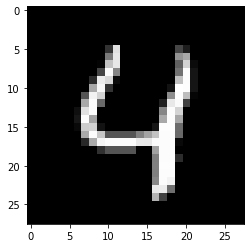

Predicted number: 4


In [123]:
model.evaluate(x_test,  y_test, verbose=2)
print("\n")

test_case = x_test[4]

# Plots a single letter from the training set and prints the ground truth
plt.imshow(test_case, cmap=plt.get_cmap('gray')) 
plt.show()

predict_x = model.predict(np.array([test_case])) 
classes_x = np.argmax(predict_x, axis = 1)
print("Predicted number:", classes_x[0])